In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 250)

In [2]:
df = pd.read_csv("data/Diabetes/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* BMI : To express the Body mass index
    * The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
    * below 18.5 – you're in the underweight range
    * between 18.5 and 24.9 – you're in the healthy weight range
    * between 25 and 29.9 – you're in the overweight range
    * 30 or over – you're in the obese range
* DiabetesPedigreeFunction : To express the percentage of diabetes

In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Pregnancies :
    1. The average no. is approximately 4, which means the data is skewed.
    2. The minimum no. is 0, which means No pregnancies and this can be logic.
    3. The maximum no. is 17, which is a very high number and may be an outlier.
* Glucose : 
    1. Minimum value is 0 which is impossible
* Blood Pressure :
    1. Minimum value is 0 which is impossible
    2. The mean is 69 which is a low blood pressure (The normal person has 120 blood pressure)
    3. The max value is 122 which is a low value to be the maximum value
* Skin Thickness :
    1. It is impossible to have a value of zero (which is the actual minimum value in the dataset)
* Insulin :
    1. Min value = 0 (which is possible)
    2. Max value = 99 (possible)
    3. The data is skewed
* BMI :
    1. Min value = 0, which is, medically, impossible.
    2. Max value = 67, which is very high for non diabetic person.

### Insights :

1. We should handle zero values in [Glucose, Blood pressure, skin thickness, BMI]
2. To have a blood pressure less than 100 and not diabetic, this means something is wrong
3. Take care blood pressure may be biased to diabetic patients and don't have much of normal people data
4. To get more than 50 insulin level and not diabetic there something wrong
5. To be more than 30 (BMI) and non diabetic, there is something wrong

In [5]:
zero_values = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
for i in zero_values:
    print(df[df[i]==0].shape[0])

5
35
227
11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
missing = df.isnull().sum()
missing

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Handling zero values**

In [8]:
for i in zero_values:
    for j in df.loc[df[i]==0].index:
        df.at[j, i] = np.median(df[i])

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.loc[df.duplicated()] # no duplicates

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


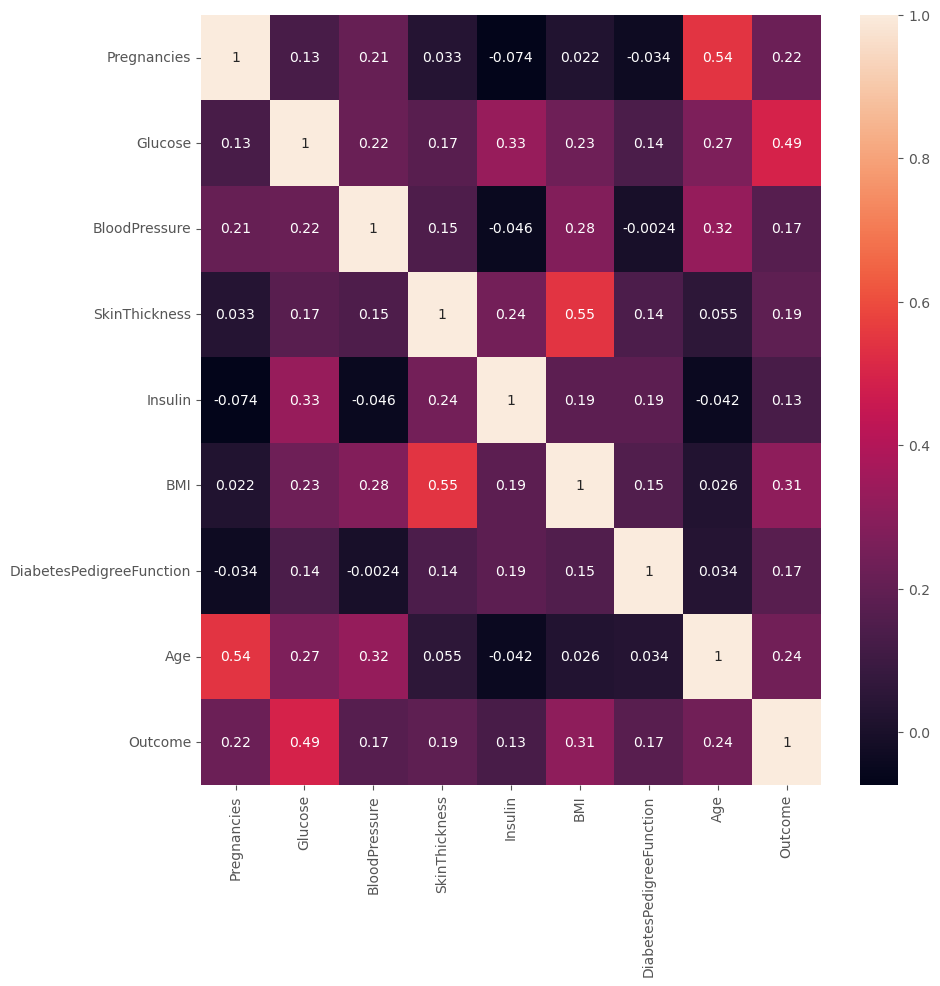

In [12]:
cm = df.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.show()

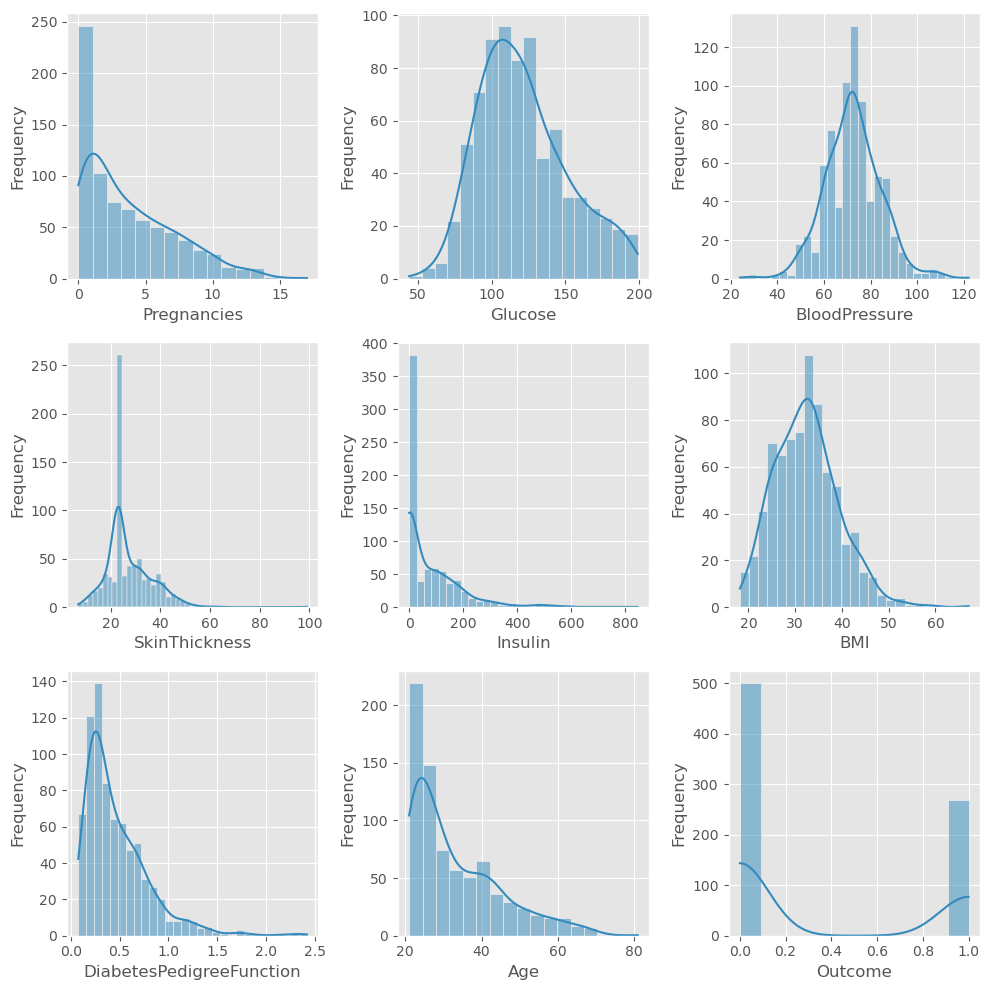

In [13]:
fig = plt.figure(figsize=(10,10))
for i in range(len(df.columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[df.columns[i]], kde=True)
    plt.xlabel(df.columns[i])
    plt.ylabel("Frequency")
    #plt.legend()
    plt.tight_layout()
plt.show()

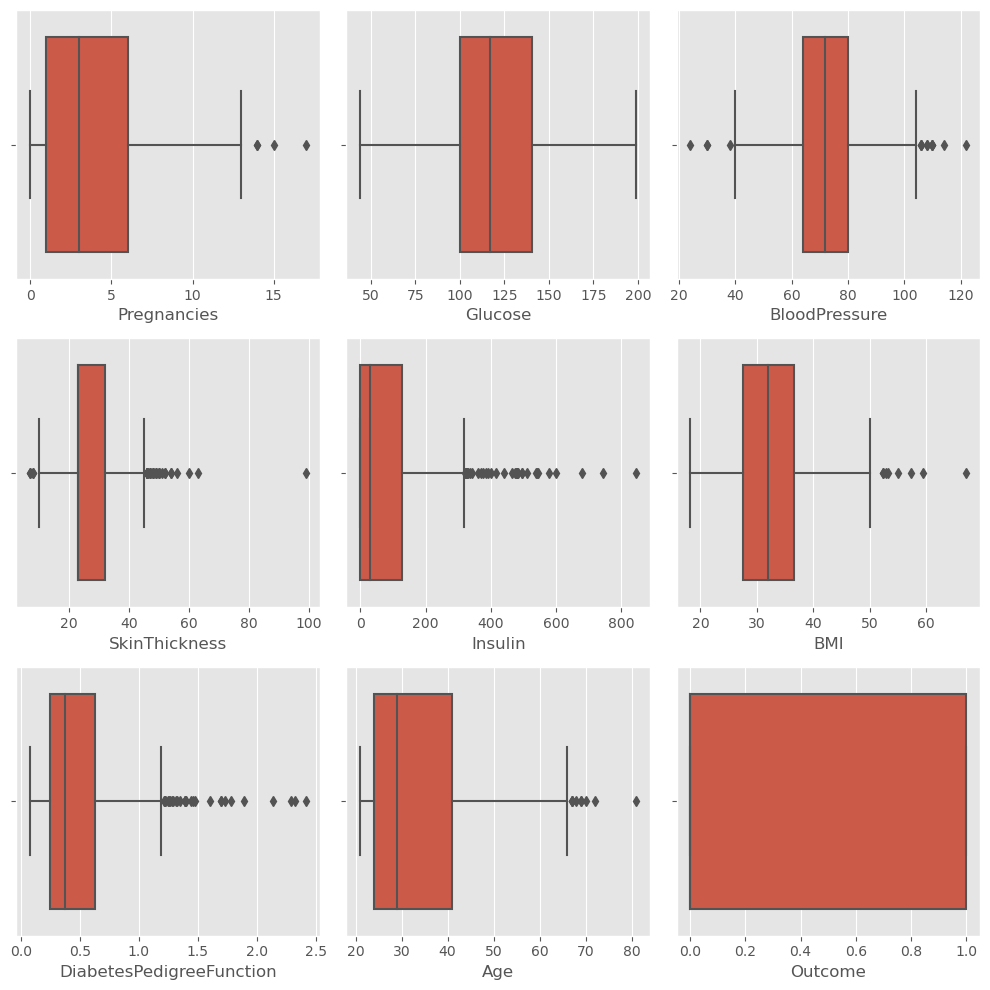

In [14]:
fig = plt.figure(figsize=(10,10))
for i in range(len(df.columns)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[df.columns[i]])
    plt.xlabel(df.columns[i])
    #plt.legend()
    plt.tight_layout()
plt.show()

In [15]:
def handle_outliers(df, featurename):
    Q3 = np.percentile(df[featurename], 75)
    Q1= np.percentile(df[featurename], 25)
    IQR = Q3 - Q1
    Max_Val = Q3 + (1.5*IQR)
    Min_Val = Q1 - (1.5*IQR)
    for i in df[featurename]:
        if i > Max_Val or i < Min_Val:
            df[featurename] = df[featurename].replace(i, np.median(df[featurename]))

for i in df.columns:
    handle_outliers(df, i)

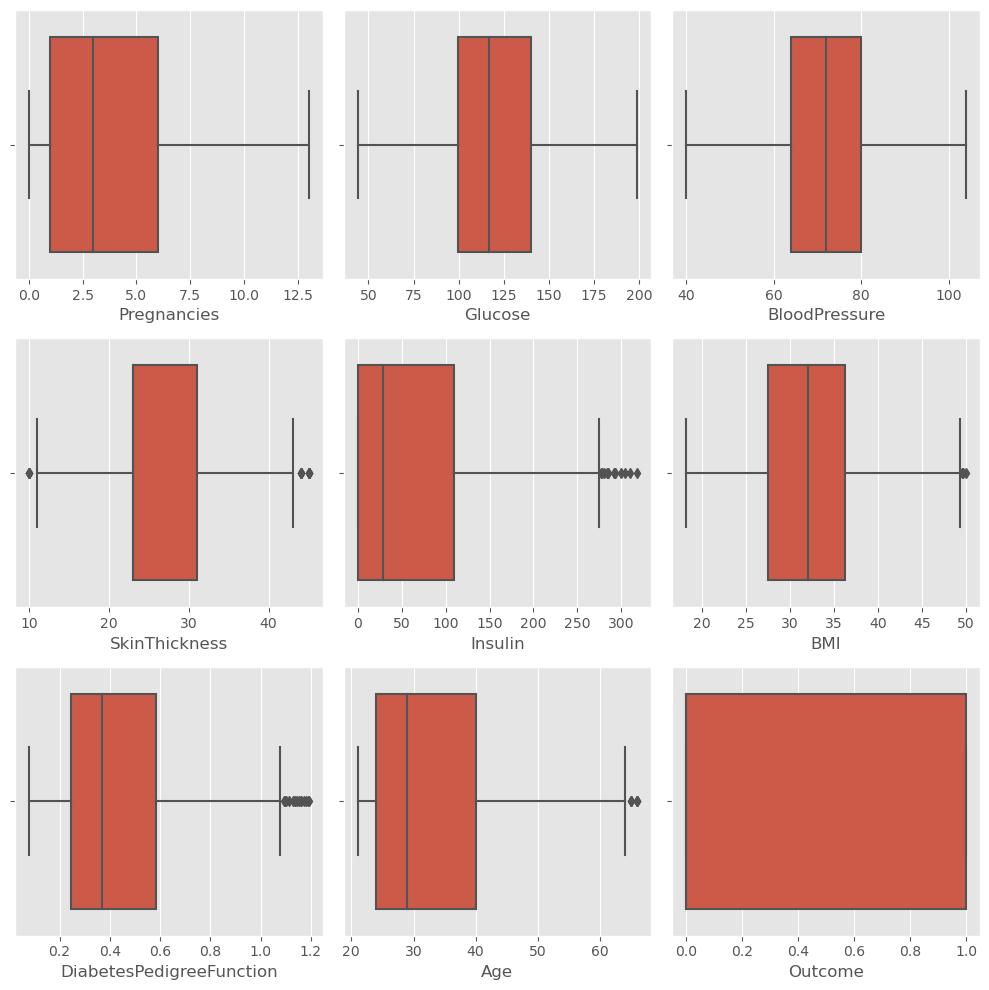

In [16]:
fig = plt.figure(figsize=(10,10))
for i in range(len(df.columns)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[df.columns[i]])
    plt.xlabel(df.columns[i])
    #plt.legend()
    plt.tight_layout()
plt.show()

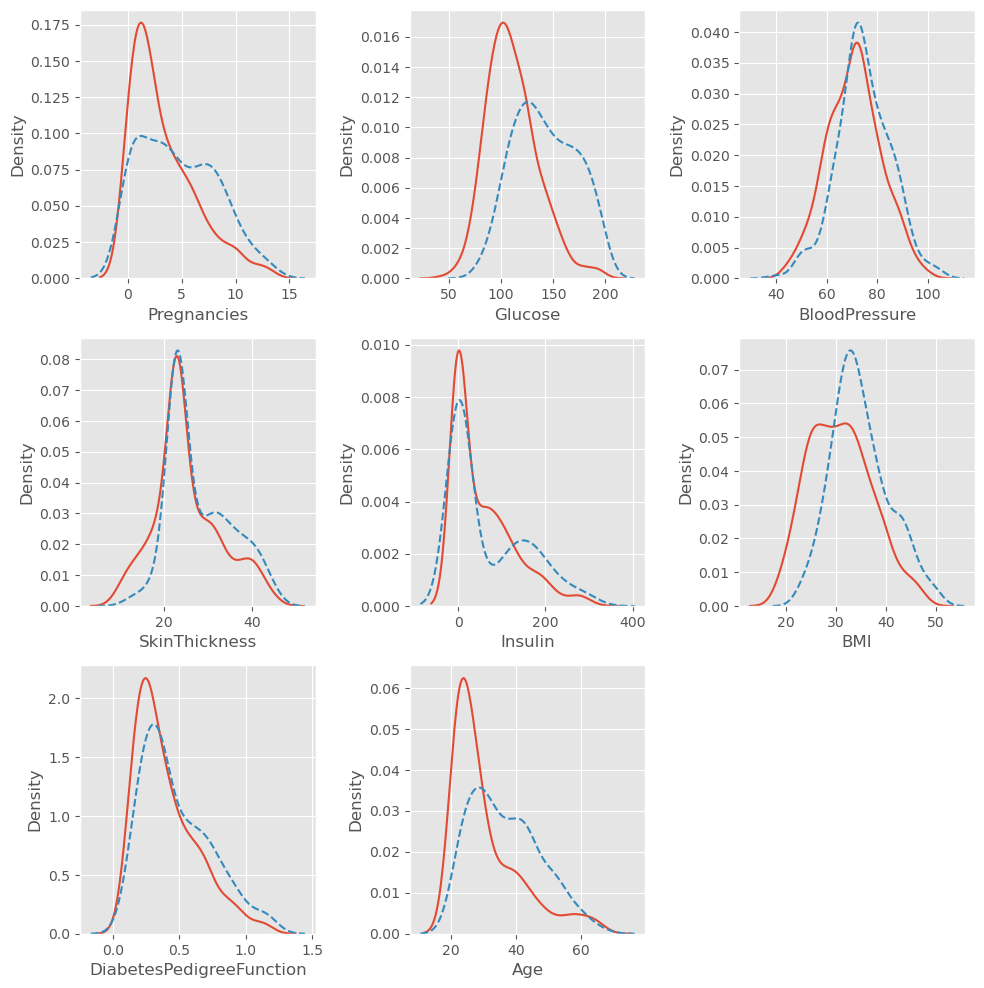

In [17]:
plt.subplots(3,3, figsize=(10,10))
for i, col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.distplot(df.loc[df["Outcome"]==0][col], hist=False, kde_kws={'linestyle':'-', 'label':'no diabetes'})
    sns.distplot(df.loc[df["Outcome"]==1][col], hist=False, kde_kws={'linestyle':'--', 'label':'diabetes'})
plt.tight_layout()
plt.subplot(3,3,9).set_visible(False)
plt.show()

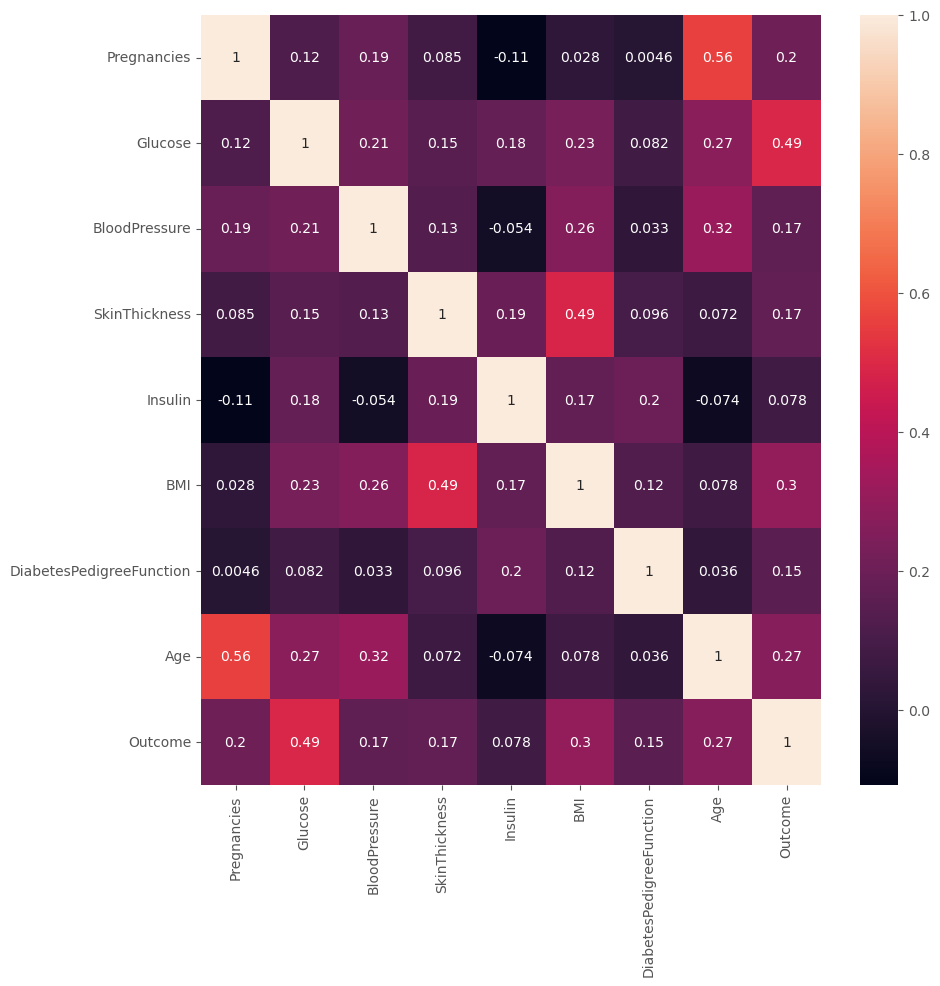

In [18]:
cm = df.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.show()

***It is obvious that Bloodpressure, Insulin, SkinThickness, and DiabetesPedigreeFunction are not the best features to describe the Outcome***

In [19]:
df = df.drop(["Insulin", "DiabetesPedigreeFunction", "SkinThickness", "BloodPressure"], 1)

## Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop(["Outcome"], 1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=44)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

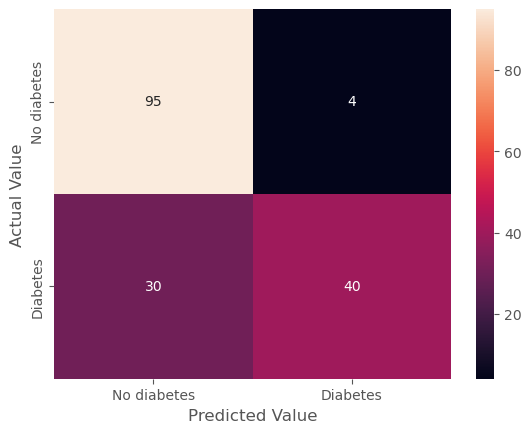

In [24]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, xticklabels=["No diabetes", "Diabetes"], yticklabels=["No diabetes", "Diabetes"])
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()

In [25]:
acc_train = accuracy_score(y_train, y_pred_train)
print("Training accuracy : ", round(acc_train, 2))
acc_test = accuracy_score(y_test, y_pred_test)
print("Testing accuracy : ", round(acc_test, 2))

Training accuracy :  0.76
Testing accuracy :  0.8


In [26]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        99
           1       0.91      0.57      0.70        70

    accuracy                           0.80       169
   macro avg       0.83      0.77      0.77       169
weighted avg       0.82      0.80      0.79       169



**explanation :**
* Precision:- Accuracy of positive predictions.
    * Precision = TP/(TP + FP) = 40 / (40+4)
    * In our example : Out of all women that the model predicted to have diabetes, only 91% actually have.
    * **More Explanation :** The model predicted that 44 women have diabetes, while only 40, actually, have.
    
* Recall:- What percent of the positive cases did you catch?
    * Recall = TP/(TP+FN) = 40 / (40+30)
    * meaning : The real data we have says that we have 70 women have diabetes but the model predicted only 40 of them correctly
    * 57% of the women have diabetes are correctly predicted by the model.
    
* F1 score:- What percent of positive predictions were correct?
    * The closer to 1.0, the better the model.
    
* Support:- The number of actual occurrences of the class in the specified dataset.

**Cross-validation using k-folds**

In [27]:
from sklearn.model_selection import KFold

# Define the number of folds (k)
k = 10

kf = KFold(n_splits=k, shuffle=True, random_state=44)
acc_train_Scores = []
acc_test_Scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))
    #print(f"Accuracy training = {acc_train}, Accuracy testing = {acc_test}")
    acc_train_Scores.append(np.abs(acc_train))
    acc_test_Scores.append(np.abs(acc_test))

print(f"across {k} folds :-\n Average training accuarcy: {round(np.mean(acc_train_Scores), 2)}"
      f", Average testing accuarcy: {round(np.mean(acc_test_Scores), 2)}")

across 10 folds :-
 Average training accuarcy: 0.77, Average testing accuarcy: 0.77


## Try to put random data from my own

In [28]:
data = np.array([[2, 125, 25.9, 20], [5, 140, 35, 45]])
model.predict(data)

array([0, 1], dtype=int64)

* I entered two data points :
    1. a 20 years old female, who got pregnant twice. She has a glucose level equals 125 (which is normal) and she is 1.7 m tall and 75 kg weight, what makes the BMI = 25.9
    2. a 45 years old female, who got pregnant 5 times. She has a glucose level equals 140 (which is greater than the normal) and her BMI is 35 (which is greater than the normal)
    
* **The result of the experiment:**
    * The first woman had output "0" which means "No Diabetes"
    * The second woman had output "1" which means "She has Diabetes"